In [78]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

%matplotlib inline

# data

## data read

In [51]:
mnist = fetch_openml("mnist_784", as_frame = False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [52]:
X, y = mnist["data"], mnist["target"]
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (70000, 784)
y shape: (70000,)


## data show

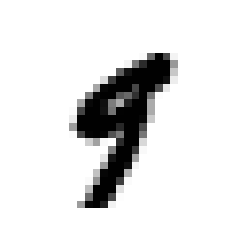

In [53]:
digit = X[36000, :]
digit_image = digit.reshape(int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1])))
plt.imshow(digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

## data split

In [63]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 60000, test_size=10000)

array(['8', '7', '2', ..., '8', '3', '8'], dtype=object)

## data shuffle

In [64]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# model

## binary classifier

### model training

In [67]:
y_train_9 = (y_train == "9")
y_test = (y_test == "9")

In [70]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_9)

SGDClassifier(random_state=42)

### model predict

In [74]:
sgd_clf.predict([digit])

array([False])

### model performance

In [73]:
cross_val_score(sgd_clf, X_train, y_train_9, cv = 3, scoring = "accuracy")

array([0.92855, 0.94655, 0.8929 ])

In [75]:
pd.Series(y_train_9).value_counts()

False    54026
True      5974
dtype: int64

### confusion matrix

In [77]:
y_train_9_predict = cross_val_predict(sgd_clf, X_train, y_train_9, cv = 3)
confusion_matrix(y_train_9, y_train_9_predict)

array([[50086,  3940],
       [  700,  5274]])

In [79]:
precision_score(y_train_9, y_train_9_predict)

0.5723898415454742

In [81]:
recall_score(y_train_9, y_train_9_predict)

0.8828255775025109

In [82]:
f1_score(y_train_9, y_train_9_predict)

0.6944956544640505